### Data load
main result

In [2]:
c = '''0.998 	0.999 	0.999 	0.998 	0.999 	0.999 	0.998 	0.959 	0.997 	0.930 	0.961 	0.993 	0.930 	0.996 	0.999 	1.000 	1.000 	1.000 	1.000 	1.000 	1.000 
0.948 	0.613 	0.882 	0.869 	0.606 	0.901 	0.950 	0.158 	0.751 	0.694 	0.195 	0.708 	0.683 	0.744 	0.915 	0.991 	0.958 	0.986 	0.990 	0.886 	0.952 
0.920 	0.398 	0.963 	0.905 	0.398 	0.952 	0.998 	0.376 	0.950 	0.470 	0.296 	0.915 	0.738 	0.960 	0.983 	0.999 	0.983 	0.998 	0.998 	0.972 	0.989 
0.967 	0.799 	0.981 	0.965 	0.800 	0.981 	0.989 	0.779 	0.987 	0.956 	0.805 	0.970 	0.955 	0.979 	0.998 	1.000 	0.987 	0.999 	0.995 	0.988 	0.995 
0.963 	0.479 	0.885 	0.957 	0.474 	0.883 	0.996 	0.426 	0.891 	0.702 	0.282 	0.785 	0.736 	0.950 	0.990 	0.983 	0.972 	0.989 	0.987 	0.941 	0.989 
0.887 	0.662 	0.872 	0.904 	0.680 	0.880 	0.945 	0.660 	0.973 	0.978 	0.751 	0.870 	0.935 	0.980 	0.997 	0.970 	0.994 	0.999 	0.953 	0.943 	0.995 
0.957 	0.180 	0.941 	0.945 	0.180 	0.943 	0.971 	0.060 	0.932 	0.554 	0.097 	0.826 	0.234 	0.879 	0.978 	0.984 	0.913 	0.983 	0.914 	0.854 	0.953 
0.997 	0.466 	0.948 	0.691 	0.158 	0.840 	0.997 	0.463 	0.976 	0.694 	0.141 	0.915 	0.710 	0.715 	0.903 	0.696 	0.685 	0.897 	1.000 	0.609 	0.862 
0.422 	0.217 	0.750 	0.405 	0.205 	0.745 	0.358 	0.176 	0.770 	0.186 	0.125 	0.684 	0.484 	0.620 	0.935 	0.298 	0.422 	0.926 	0.998 	0.731 	0.969 
0.885 	0.750 	0.972 	0.773 	0.540 	0.876 	0.960 	0.253 	0.924 	0.795 	0.436 	0.822 	0.737 	0.677 	0.952 	0.953 	0.627 	0.923 	0.971 	0.787 	0.953 
0.901 	0.375 	0.749 	0.893 	0.368 	0.744 	1.000 	0.261 	0.871 	0.833 	0.677 	0.850 	0.876 	0.984 	0.997 	0.998 	0.988 	0.998 	0.920 	0.914 	0.961 
1.000 	0.978 	0.996 	1.000 	0.978 	0.996 	1.000 	0.984 	0.996 	1.000 	0.972 	0.995 	0.984 	0.985 	0.997 	1.000 	1.000 	1.000 	1.000 	0.978 	0.996 
0.789 	0.594 	0.919 	0.547 	0.729 	0.965 	1.000 	0.287 	0.948 	0.802 	0.928 	0.960 	0.749 	0.987 	0.999 	0.753 	0.805 	0.983 	1.000 	0.976 	0.989 
0.224 	0.105 	0.693 	0.249 	0.034 	0.718 	0.492 	0.112 	0.937 	0.315 	0.071 	0.724 	0.220 	0.437 	0.873 	1.000 	0.977 	0.991 	1.000 	0.982 	0.995 
0.814 	0.392 	0.896 	0.765 	0.284 	0.835 	0.949 	0.383 	0.902 	0.759 	0.359 	0.843 	0.712 	0.549 	0.898 	0.805 	0.562 	0.892 	0.831 	0.528 	0.879 
0.845 	0.534 	0.896 	0.791 	0.495 	0.884 	0.907 	0.422 	0.920 	0.711 	0.473 	0.857 	0.712 	0.829 	0.961 	0.895 	0.858 	0.971 	0.970 	0.873 	0.965'''


# count baseline num

num = int(len(c.split('\n')[0].split('\t')) / 3)

GA, MLA, ED = [], [], []

for i in range(num):

    GA.append([])

    MLA.append([])

    ED.append([])


lines = c.split('\n')

for line in lines:

    num_list = line.split('\t')

    for i in range(num):

        GA[i].append(float(num_list[i*3]))

        MLA[i].append(float(num_list[i*3 + 1]))

        ED[i].append(float(num_list[i*3 + 2]))

### Draw
robust

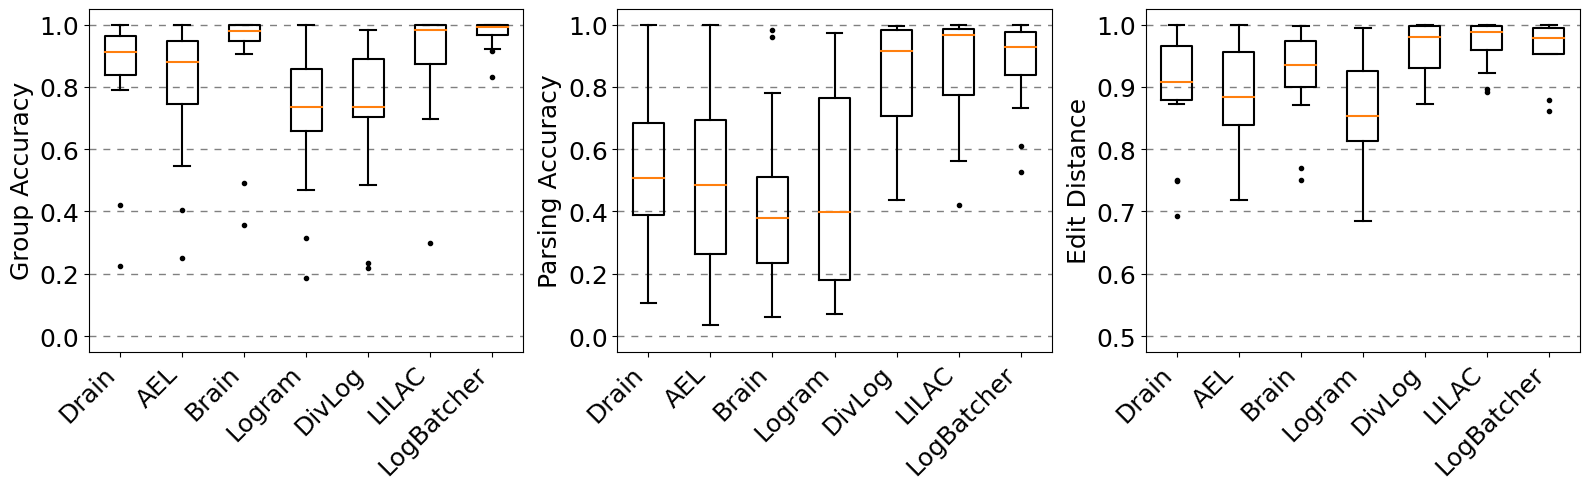

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    'Log Parser': ['Drain', 'AEL', 'Brain', 'Logram', 'DivLog', 'LILAC', 'LogBatcher'],
    'Group Accuracy': GA,
    'Parsing Accuracy': MLA,
    'Normalized Edit Distance': ED
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)
flierprops = dict(marker='o', color='black', markersize=3,
                  markerfacecolor='black', markeredgecolor='black')
# 绘制箱线图
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

label_fontsize = 18
x_fontsize = 18
y_fontsize = 18
special_tick_fontsize = 16  # 特定指标的字体大小
space_size = 0.05
line_size = dict(linewidth=1.5)


for ax in axs[:2]:
    for i in [0,0.2,0.4,0.6,0.8,1.0]:
        ax.axhline(y=i, color='gray', linestyle='--', linewidth=1, dashes=(5, 5))
    ax.tick_params(axis='y', labelsize=y_fontsize)

for i in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    axs[2].axhline(y=i, color='gray', linestyle='--', linewidth=1, dashes=(5, 5))
# Adjust y-axis label font siz
axs[2].tick_params(axis='y', labelsize=y_fontsize)
# Group Accuracy
axs[0].boxplot(df['Group Accuracy'], labels=df['Log Parser'], boxprops=line_size, capprops=line_size,
               whiskerprops=line_size, medianprops=line_size,
               flierprops=flierprops)
axs[0].set_ylabel('Group Accuracy', rotation=90, fontsize=label_fontsize)
axs[0].set_ylim(0-space_size, 1+space_size)
axs[0].set_xticklabels(df['Log Parser'], rotation=45,
                       ha='right', fontsize=x_fontsize)


# Parsing Accuracy
axs[1].boxplot(df['Parsing Accuracy'], boxprops=line_size, capprops=line_size,
               whiskerprops=line_size, medianprops=line_size,
               labels=df['Log Parser'], flierprops=flierprops)
axs[1].set_ylabel('Parsing Accuracy', rotation=90, fontsize=label_fontsize)
axs[1].set_ylim(0-space_size, 1+space_size)
axs[1].set_xticklabels(df['Log Parser'], rotation=45,
                       ha='right', fontsize=x_fontsize)

# Edit Distance
axs[2].boxplot(df['Normalized Edit Distance'], boxprops=line_size, capprops=line_size,
               whiskerprops=line_size,medianprops = line_size,
               labels=df['Log Parser'], flierprops=flierprops)
axs[2].set_ylabel('Edit Distance', rotation=90, fontsize=label_fontsize)
axs[2].set_ylim(0.5 - space_size/2, 1 + space_size/2)
axs[2].set_xticklabels(df['Log Parser'], rotation=45,
                       ha='right', fontsize=x_fontsize)

plt.tight_layout()

# 保存为 PDF 文件
plt.savefig('outputs/figures/RQ1_Robust.pdf', format='pdf')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
data = {
    'Log Parser': ['Drain', 'AEL', 'Brain', 'Logram', 'Spell', 'LILAC', 'LogBatcher'],
    'Group Accuracy': GA,
    'Parsing Accuracy': PA,
    'Normalized Edit Distance': NED
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)
flierprops = dict(marker='o', color='black', markersize=1)
 
with PdfPages('test.pdf') as pdf:
    fig, axs = plt.subplots(1, 7, figsize=(15, 2))

    metrics = ['GA', 'PA', 'NED']
    boxplot_data = []
    for i, parser in enumerate(df['Log Parser']):
        parser_data = [df['Group Accuracy'][i], df['Parsing Accuracy'][i], df['Normalized Edit Distance'][i]]
        
        
        bp = axs[i].boxplot(parser_data, labels=metrics, flierprops=flierprops)
        axs[i].set_title(f'{parser}')
        axs[i].set_ylim(0, 1)
        axs[i].axhline(y=0.2, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=0.4, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=0.6, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=0.8, color='gray', linestyle='--', linewidth=0.5)
        axs[i].axhline(y=1.0, color='gray', linestyle='--', linewidth=0.5)
        # 获取箱线图的统计数据
        for j, metric in enumerate(metrics):
            stats = {
                'Log Parser': parser,
                'Metric': metric,
                'Q1': bp['boxes'][j].get_ydata()[0],
                'Median': bp['medians'][j].get_ydata()[0],
                'Q3': bp['boxes'][j].get_ydata()[2],
                'Whisker_low': bp['whiskers'][2*j].get_ydata()[1],
                'Whisker_high': bp['whiskers'][2*j+1].get_ydata()[1],
                'Mean': np.mean(parser_data[j])
            }
            boxplot_data.append(stats)
    plt.tight_layout()
    pdf.savefig(fig)  # 保存当前图像到PDF文件
    plt.close()

# 打印箱线图统计数据
for item in boxplot_data:
    print(item)

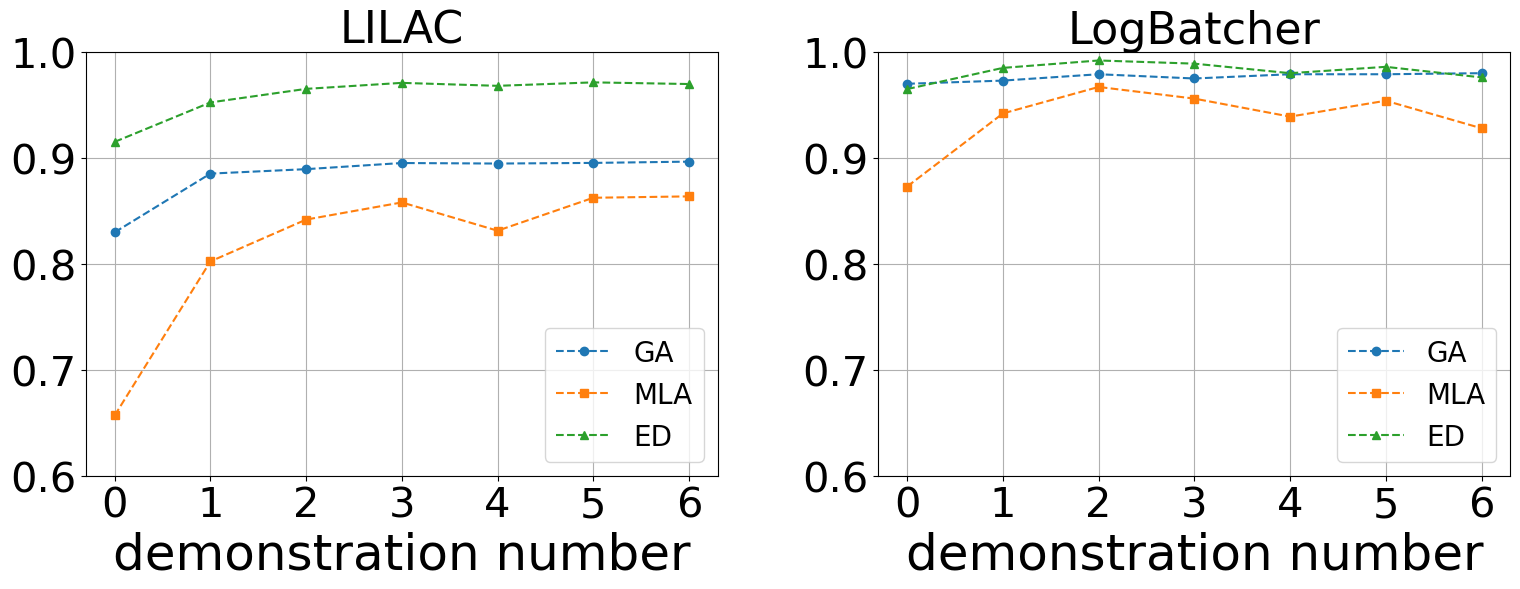

In [31]:
import matplotlib.pyplot as plt

# Define the data
data1 = '''0.8298 0.6569 0.91518
0.8852 0.8023 0.95239
0.8894 0.8418 0.9652
0.8952 0.858 0.97086
0.8947 0.8313 0.96806
0.8953 0.8624 0.97133
0.8965 0.8637 0.96976'''

data2 = '''0.970 	0.873 	0.965 
0.973 	0.942 	0.985 
0.979 	0.967 	0.992 
0.975 	0.956 	0.989 
0.979 	0.939 	0.980 
0.979 	0.954 	0.986 
0.980 	0.928 	0.976'''

# Function to process data


def process_data(data):
    accuracy_metric1 = []
    accuracy_metric2 = []
    accuracy_metric3 = []

    data_list = data.replace('\t', ' ').replace('\n', ' ').replace('  ',' ').split()
    for index, data_item in enumerate(data_list):
        if index % 3 == 0:
            accuracy_metric1.append(float(data_item))
        elif index % 3 == 1:
            accuracy_metric2.append(float(data_item))
        else:
            accuracy_metric3.append(float(data_item))

    return accuracy_metric1, accuracy_metric2, accuracy_metric3


# Process the data
accuracy_metric1_data1, accuracy_metric2_data1, accuracy_metric3_data1 = process_data(
    data1)
accuracy_metric1_data2, accuracy_metric2_data2, accuracy_metric3_data2 = process_data(
    data2)

# Data for the plot
shots = [0, 1, 2, 3, 4, 5, 6]

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

font_size = 36
label_size = 30
title_size = 32
legend_size = 20

# Plot data1
ax1.plot(shots, accuracy_metric1_data1, marker='o', linestyle='--', label='GA')
ax1.plot(shots, accuracy_metric2_data1, marker='s', linestyle='--', label='MLA')
ax1.plot(shots, accuracy_metric3_data1,
         marker='^', linestyle='--', label='ED')
ax1.set_xlabel('demonstration number', fontsize=font_size)
ax1.set_xticks(shots)
ax1.set_yticks([i/10 for i in range(5, 11)])
ax1.set_ylim(0.6, 1)
ax1.legend(loc = 'lower right',prop = {'size': 20})
ax1.grid(True)
ax1.set_title('LILAC', fontsize=title_size)

# Set bold font for tick labels on ax1
plt.setp(ax1.get_xticklabels(), fontsize=label_size)
plt.setp(ax1.get_yticklabels(), fontsize=label_size)

# Plot data2
ax2.plot(shots, accuracy_metric1_data2, marker='o', linestyle='--', label='GA')
ax2.plot(shots, accuracy_metric2_data2, marker='s', linestyle='--', label='MLA')
ax2.plot(shots, accuracy_metric3_data2,
         marker='^', linestyle='--', label='ED')
ax2.set_xlabel('demonstration number', fontsize=font_size)
ax2.set_xticks(shots)
ax2.set_yticks([i/10 for i in range(5, 11)])
ax2.set_ylim(0.6, 1)
ax2.legend(loc = 'lower right', prop={'size': 20})
ax2.grid(True)
ax2.set_title('LogBatcher', fontsize=title_size)

# Set bold font for tick labels on ax2
plt.setp(ax2.get_xticklabels(), fontsize=label_size)
plt.setp(ax2.get_yticklabels(), fontsize=label_size)

# Create a common legend for both plots
# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
#     0.5, 1.15), ncol=3, prop={'size': legend_size})

plt.subplots_adjust(wspace=30)

# Show the plot
plt.tight_layout()
plt.savefig('outputs/figures/RQ3_supervised.pdf')
plt.show()

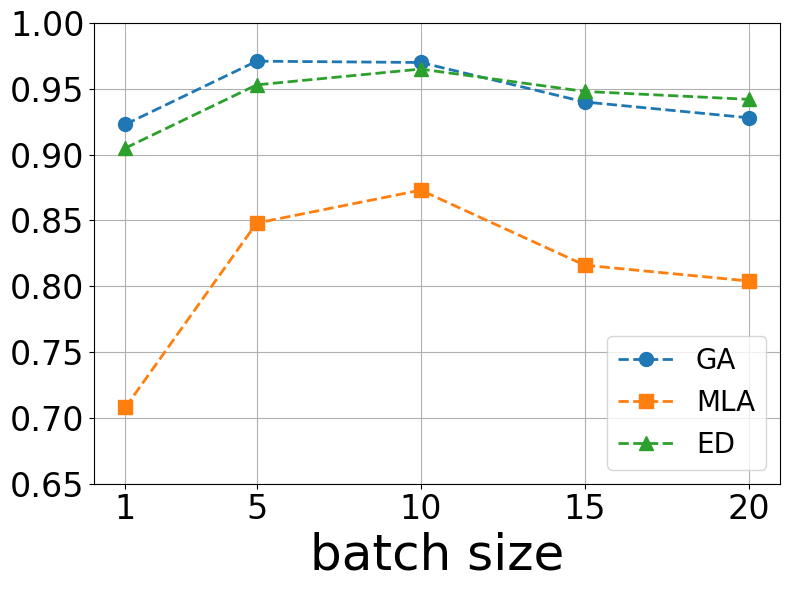

In [2]:
import matplotlib.pyplot as plt

# Define the data
data1 = '''0.923 0.708 0.905
0.971 0.848 0.953 
0.970 0.873 0.965 
0.940 0.816 0.948 
0.928 0.804 0.942'''

# Function to process data
def process_data(data):
    accuracy_metric1 = []
    accuracy_metric2 = []
    accuracy_metric3 = []

    data_list = data.replace('\n', ' ').strip().split()
    for index, data_item in enumerate(data_list):
        if index % 3 == 0:
            accuracy_metric1.append(float(data_item))
        elif index % 3 == 1:
            accuracy_metric2.append(float(data_item))
        else:
            accuracy_metric3.append(float(data_item))

    return accuracy_metric1, accuracy_metric2, accuracy_metric3

# Process the data
accuracy_metric1_data1, accuracy_metric2_data1, accuracy_metric3_data1 = process_data(data1)

# Data for the plot
shots = [1, 5, 10, 15, 20]

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

font_size = 36
label_size = 24
title_size = 32

# Plot data1
ax1.plot(shots, accuracy_metric1_data1, marker='o', 
        linestyle='--', label='GA', linewidth=2, markersize=10)
ax1.plot(shots, accuracy_metric2_data1, marker='s',
         linestyle='--', label='MLA', linewidth=2, markersize=10)
ax1.plot(shots, accuracy_metric3_data1, marker='^',
         linestyle='--', label='ED', linewidth=2, markersize=10)
ax1.set_xlabel('batch size', fontsize=font_size)
ax1.set_xticks(shots)
ax1.set_yticks([i/100 for i in range(30, 101,5)])
ax1.set_ylim(0.65, 1)
ax1.legend(loc = 'lower right', prop={'size': 20})
ax1.grid(True)
# ax1.set_title('LILAC', fontsize=title_size)

# Set bold font for tick labels on ax1
plt.setp(ax1.get_xticklabels(), fontsize=label_size)
plt.setp(ax1.get_yticklabels(), fontsize=label_size)

# Show the plot
plt.tight_layout()
plt.savefig('outputs/figures/RQ2_batchsize.pdf')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define the data
data1 = '''0.971 0.848 0.953 
0.970 0.873 0.965 
0.940 0.816 0.948 
0.928 0.804 0.942'''

# Function to process data


def process_data(data):
    accuracy_metric1 = []
    accuracy_metric2 = []
    accuracy_metric3 = []

    data_list = data.replace('\n', ' ').strip().split()
    for index, data_item in enumerate(data_list):
        if index % 3 == 0:
            accuracy_metric1.append(float(data_item))
        elif index % 3 == 1:
            accuracy_metric2.append(float(data_item))
        else:
            accuracy_metric3.append(float(data_item))

    return accuracy_metric1, accuracy_metric2, accuracy_metric3


# Process the data
accuracy_metric1_data1, accuracy_metric2_data1, accuracy_metric3_data1 = process_data(
    data1)

# Data for the plot
shots = [0, 1, 2, 3]

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

font_size = 30
label_size = 24
title_size = 32

# Plot data1 with enhanced visuals
ax1.plot(shots, accuracy_metric1_data1, marker='o',
         linestyle='--', linewidth=2, markersize=10, label='GA')
ax1.plot(shots, accuracy_metric2_data1, marker='s',
         linestyle='--', linewidth=2, markersize=10, label='PA')
ax1.plot(shots, accuracy_metric3_data1, marker='^',
         linestyle='--', linewidth=2, markersize=10, label='ED')
ax1.set_xlabel('demonstration number', fontsize=font_size)
ax1.set_xticks(shots)
# Adjust y-ticks for better granularity
ax1.set_yticks([i/100 for i in range(60, 101, 5)])
ax1.set_ylim(0.65, 1)  # Zoom in on y-axis for better visibility of variations
ax1.legend()
ax1.grid(True)
ax1.set_title('LILAC', fontsize=title_size)

#

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = '''0.923 0.708 0.905
0.971 0.848 0.953
0.970 0.873 0.965
0.940 0.816 0.948
0.928 0.804 0.942'''



# 数据
categories = ['GA', 'MLA', 'ED']
data = data.split('\n')


x = np.arange(len(categories))  # 标签位置
width = 0.15  # 条形图的宽度
spacing = 0.015  # 间隔

fig, ax = plt.subplots()

# 绘制条形图，增加间隔
rects1 = ax.bar(x - 1.5*width - spacing, data[0:3], width,
                label='ALERT', edgecolor='black', color='#8DA2C1')
rects2 = ax.bar(x - 0.5*width, data[3:6], width, label='WIR',
                edgecolor='black', color='#A2B28B')
rects3 = ax.bar(x + 0.5*width + spacing, data[6:9], width,
                label='BeamAttack', edgecolor='black', color='#DEB18C')

rects3 = ax.bar(x + 0.5*width + spacing*2, data[9:12], width,
                label='BeamAttack', edgecolor='black', color='#DEB18C')

# 添加一些文本标签
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 设置图例横向排列
ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.10))

fig.tight_layout()
# plt.savefig("./pics/model invocation for Code-summarization.pdf")
plt.show()

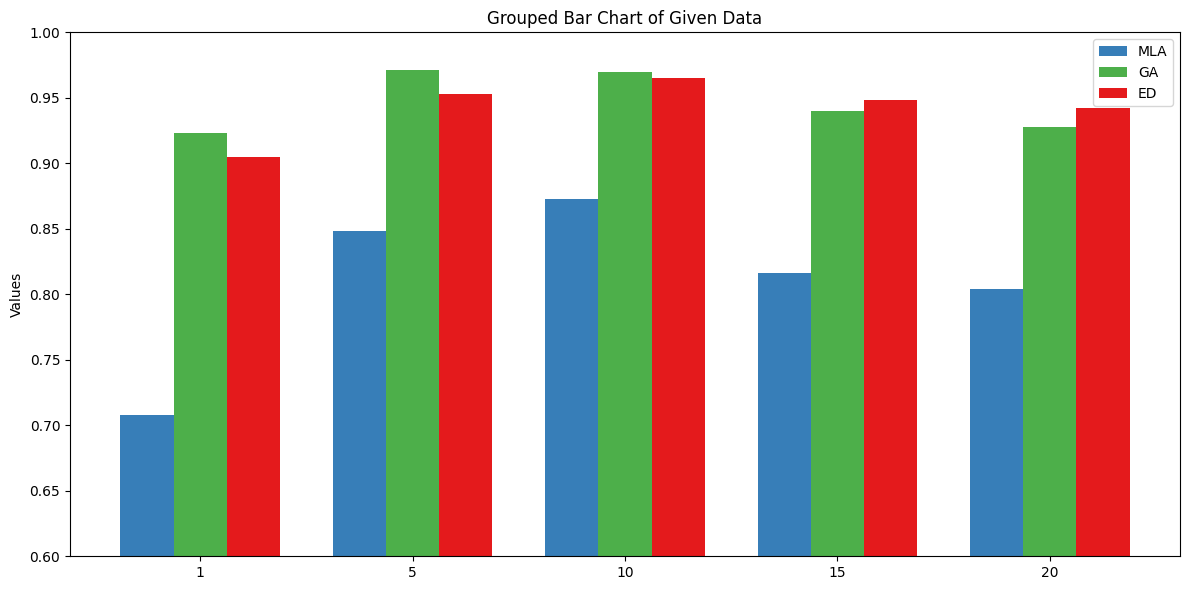

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
data = '''0.923 0.708 0.905
0.971 0.848 0.953
0.970 0.873 0.965
0.940 0.816 0.948
0.928 0.804 0.942'''

# Splitting and converting data to numpy array
data_array = np.array([list(map(float, row.split()))
                      for row in data.split('\n')])

# Reordering columns to have MLA, GA, ED
data_array = data_array[:, [1, 0, 2]]

# Defining the labels and x positions
labels = ['MLA', 'GA', 'ED']

# Defining the width of each bar
bar_width = 0.25

# Colors and markers for the line plots
line_styles = ['--', '--', '--']
markers = ['o', 's', 'D']
colors = ['#377eb8', '#4daf4a', '#e41a1c']

# Plotting the bar charts for each row
fig, ax = plt.subplots(figsize=(12, 6))

# X positions for the groups
x = np.arange(len(data_array))

# Plotting each indicator as grouped bars
for i in range(data_array.shape[1]):
    ax.bar(x + i * bar_width, data_array[:, i],
           bar_width, color=colors[i], label=labels[i])

# Setting the labels and title
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['1', '5', '10', '15', '20'])
ax.set_ylim(0.6, 1)
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart of Given Data')

# Adding a legend
ax.legend()

plt.tight_layout()
plt.show()

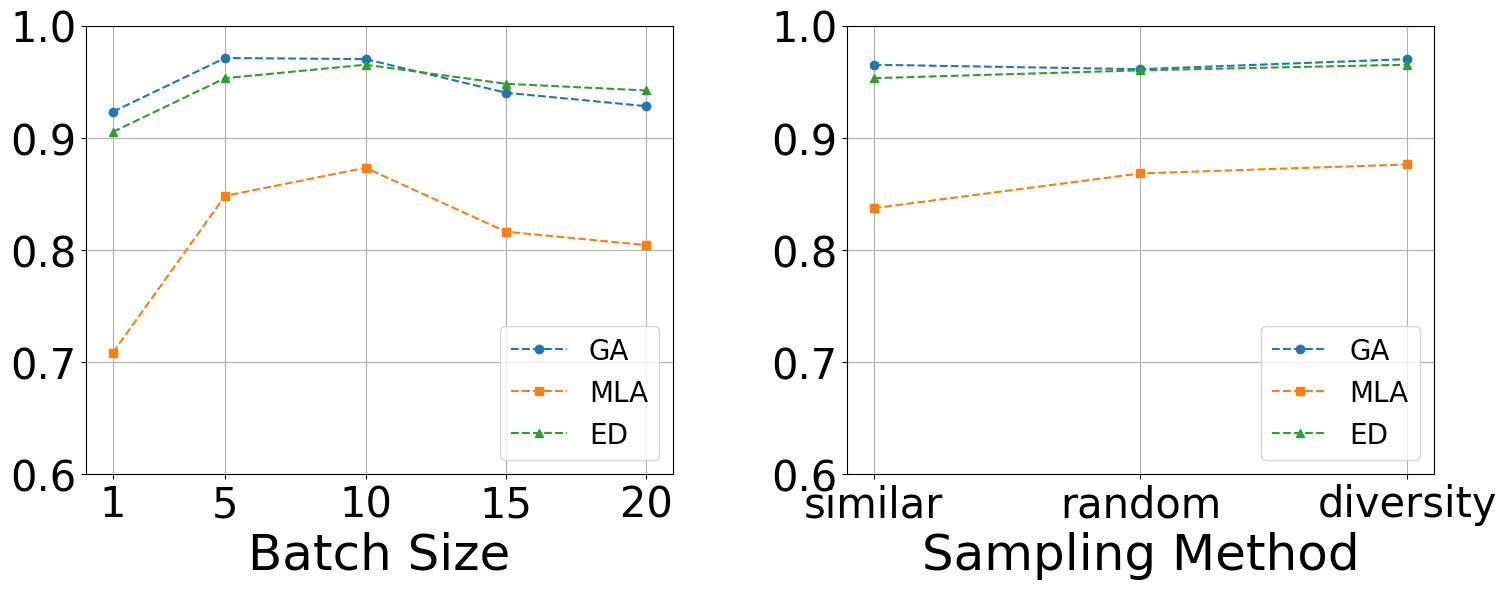

In [1]:
import matplotlib.pyplot as plt

# Define the data
data1 = '''0.923 0.708 0.905
0.971 0.848 0.953 
0.970 0.873 0.965 
0.940 0.816 0.948 
0.928 0.804 0.942'''

data2 = '''0.965 	0.837 	0.953 
0.961 	0.868 	0.960 
0.970 	0.876 	0.965'''

# Function to process data


def process_data(data):
    accuracy_metric1 = []
    accuracy_metric2 = []
    accuracy_metric3 = []

    data_list = data.replace('\t', ' ').replace(
        '\n', ' ').replace('  ', ' ').split()
    for index, data_item in enumerate(data_list):
        if index % 3 == 0:
            accuracy_metric1.append(float(data_item))
        elif index % 3 == 1:
            accuracy_metric2.append(float(data_item))
        else:
            accuracy_metric3.append(float(data_item))

    return accuracy_metric1, accuracy_metric2, accuracy_metric3


# Process the data
accuracy_metric1_data1, accuracy_metric2_data1, accuracy_metric3_data1 = process_data(
    data1)
accuracy_metric1_data2, accuracy_metric2_data2, accuracy_metric3_data2 = process_data(
    data2)

# Data for the plot
shots = [1, 5, 10, 15, 20]
methods = ['similar', 'random', 'diversity']

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

font_size = 36
label_size = 30
title_size = 32
legend_size = 20

# Plot data1
ax1.plot(shots, accuracy_metric1_data1, marker='o', linestyle='--', label='GA')
ax1.plot(shots, accuracy_metric2_data1,
         marker='s', linestyle='--', label='MLA')
ax1.plot(shots, accuracy_metric3_data1,
         marker='^', linestyle='--', label='ED')
ax1.set_xlabel('Batch Size', fontsize=font_size)
ax1.set_xticks(shots)
ax1.set_yticks([i/10 for i in range(5, 11)])
ax1.set_ylim(0.6, 1)
ax1.legend(loc='lower right', prop={'size': 20})
ax1.grid(True)
# ax1.set_title('LILAC', fontsize=title_size)

# Set bold font for tick labels on ax1
plt.setp(ax1.get_xticklabels(), fontsize=label_size)
plt.setp(ax1.get_yticklabels(), fontsize=label_size)

# Plot data2
ax2.plot(methods, accuracy_metric1_data2,
         marker='o', linestyle='--', label='GA')
ax2.plot(methods, accuracy_metric2_data2,
         marker='s', linestyle='--', label='MLA')
ax2.plot(methods, accuracy_metric3_data2,
         marker='^', linestyle='--', label='ED')
ax2.set_xlabel('Sampling Method', fontsize=font_size)
ax2.set_xticks(methods)
ax2.set_yticks([i/10 for i in range(5, 11)])
ax2.set_ylim(0.6, 1)
ax2.legend(loc='lower right', prop={'size': 20})
ax2.grid(True)
# ax2.set_title('Sampling Method', fontsize=title_size)

# Set bold font for tick labels on ax2
plt.setp(ax2.get_xticklabels(), fontsize=label_size)
plt.setp(ax2.get_yticklabels(), fontsize=label_size)

# Create a common legend for both plots
# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
#     0.5, 1.15), ncol=3, prop={'size': legend_size})

plt.subplots_adjust(wspace=30)

# Show the plot
plt.tight_layout()
plt.savefig('outputs/figures/RQ4_settings.pdf')
plt.show()